##  Introduction
In current project we perform test and quantitative comparison of 4 trading strategies:
* Moving average crossover
* Filtering strategy
* Stochastic oscilator
* End of the month strategy

In order to conduct testing of the strategies Backtester programs was built. During the backtesting single stock is bought or sold at each trade. The period of testing of the strategies is :'2013-01-01' to '2017-01-01'. 

For two strategies which contain input parameters(MA, Filtering), we wrote optimization function in order to choose optimal parameters for the testing. So for these strategies we do in-sample backtesting with period from ''2005-01-01' to '2013-01-01'. We choose S&P 500 index as for the project. In Yahoo it has ticker '^GSPC'








# Moving average

We start from data handling. In order download stock data with employ Pandas library. Through DataReader method we easily download data from Yahoo. 


In [5]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web  
import datetime
import matplotlib.pyplot as plt
from strategy2 import strategy
from optimization import *
from plot import *

Firstly we have imported all necessary libraries. Now let's download stock data and plot of the S&P 500. In a table below the graph, we have retrieved last 5 stock prices using tail() method.

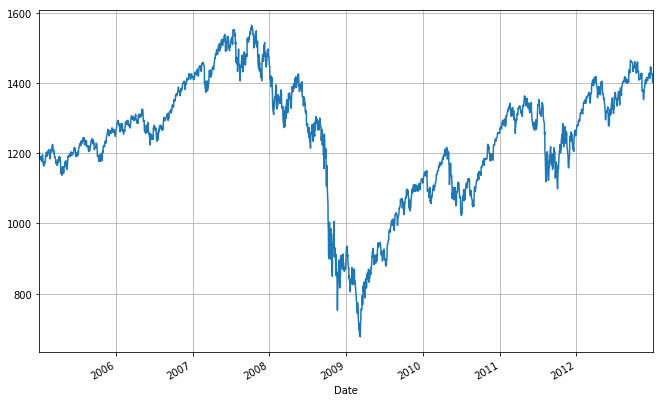

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-24,1430.150024,1430.150024,1424.660034,1426.660034,1248960000,1426.660034
2012-12-26,1426.660034,1429.420044,1416.430054,1419.829956,2285030000,1419.829956
2012-12-27,1419.829956,1422.800049,1401.800049,1418.099976,2830180000,1418.099976
2012-12-28,1418.099976,1418.099976,1401.579956,1402.430054,2426680000,1402.430054
2012-12-31,1402.430054,1426.739990,1398.109985,1426.189941,3204330000,1426.189941


In [16]:



stock = web.DataReader("^GSPC", "yahoo", start, end)# reading the stock data


stock['Adj Close'].plot(grid=True,figsize=(11,7))
plt.show()

stock.tail()#represent last 5 values



Now let's introduce the Moving Average strategy. Moving average(MA) is a simply an arithmetic average of the past n values. When the MA with less n cross(short MA) intersect MA with greater n(long MA) from below, we have a buy signal. We have selll signal in opposite case.
Let's consider MA's with n1=25 and n2=55
 
In order to see performance of the strategy we employ our "strategy" class. In current class we built all our strategies. 

In order to call Moving Average crossover strategy we built "ma" method. "ma" as other methods of "strategy" class return two output variables: Sharpe Ratio and P&L. Sharpe Ratio is a risk-adjusted performance measure, essential in evaluating of trading strategies. P&L is the profit or loss of the strategy given in base currency of trade.

First output variable is P&L, second is Sharpe Ratio.
Also we created "plot" class for visualization of some strategies. 







In [1]:
from strategy2 import strategy
from optimization import *
from plot import *
s=strategy("^GSPC",2005,1,1,2013,1,1)
k=plot("^GSPC",2005,1,1,2013,1,1)
s.ma(25,55)




(81.610168999999928, 1.0932512469669735)

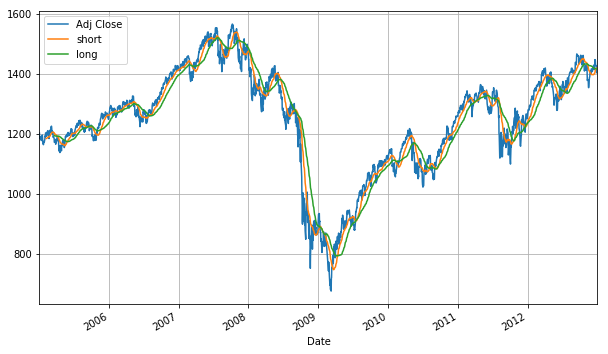

In [6]:
k.ma(25,55)

In order to compare of Moving average with other strategies we have to find optimal parameters.For this purpose we have built "optimization" function. It is virtually brute force optimization. That is we find the best performance among the given range of parameters. 
In order easily select the parameters we built colour graphs with parameters' range as axises.
We choose following "reasonable" range for the MA parameters: for short MA from 10 to 30, for long MA from 50 to 70.
We perform optimization from '2005-01-01' to '2013-01-01'. 

What strategy you want to optimize
If you want to optimize Moving Averages, type "1"
If you want to optimize Filtering strategy, type "2"
1
type "1" if you want to optimize P&L, type "2" if you want to optimize Sharpe Ratio2
Starting point for short MA10
Ending point for short MA30
Starting point for long MA50
Ending point for long MA70


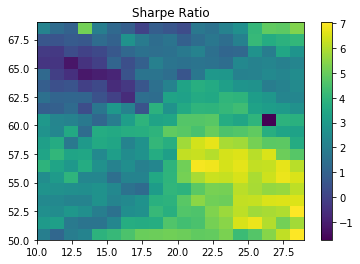

In [3]:
optimization()


What strategy you want to optimize
If you want to optimize Moving Averages, type "1"
If you want to optimize Filtering strategy, type "2"
1
type "1" if you want to optimize P&L, type "2" if you want to optimize Sharpe Ratio1
Starting point for short MA10
Ending point for short MA30
Starting point for long MA50
Ending point for long MA70


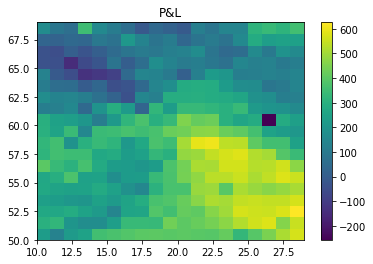

In [2]:
optimization()

All optimizations schemes give almost the same picture. We decide to choose 22 for short MA and 58 for long.


## Filtering strategy
Now we take a look at Filtering strategy. It has following representation.

Buy signal:
$$(1-\frac{P_t}{P_{t-1}}>\frac{x}{100}$$


Sell signal:
    $$(1-\frac{P_t}{P_{t-1}})<\frac{-x}{100}$$ 

In other words, if the percentage change of price from t-1 to t greater than x percent,trader should buy and hold the stock until it drops at least x percent.

For x parameter, we optimize the strategy within the range between 0.1% and 1%.

In [2]:
optimization()


What strategy you want to optimize
If you want to optimize Moving Averages, type "1"
If you want to optimize Filtering strategy, type "2"
2


,parameters,P&L,Sharpe Ratio
0,0.001,1143.270132,1.170667
1,0.002,1144.180352,1.251781
2,0.003,1020.260373,1.161134
3,0.004,1024.620540,1.180243
4,0.005,788.110164,0.984992
5,0.006,938.750482,1.301213
6,0.007,930.570553,1.385868
7,0.008,740.170649,1.143501
8,0.009,793.870476,1.318787
9,0.010,1021.930537,1.737937


In current strategy results of P&L and Sharpe Ratio differ. Rational investor would rely more on Sharpe Ratio value, since it is risk-adjusted perfomance measure. So we pick  strategy 9.

## Stochastic oscillator

Stochastic oscillator is a two-line indicator that fluctuates between 0 and 100. It can be represented in following way.
$$K=\frac{(CurrentClosePrice - LowestLow)}{(HighestHigh-LowestLow)}*100$$

D=  3-day Moving Average of K

A stock is overbought when Stochastic is above 80 and oversold if the indicator is below 20.
If indicator is overbought and then falls below 50, it indicates bearish trend(sell signal). If price was oversold and rises above 50 it indicates bullish trend(buy signal).

Here is the graphic of Stochastic oscilator for period from  ''2005-01-01' to '2013-01-01'.




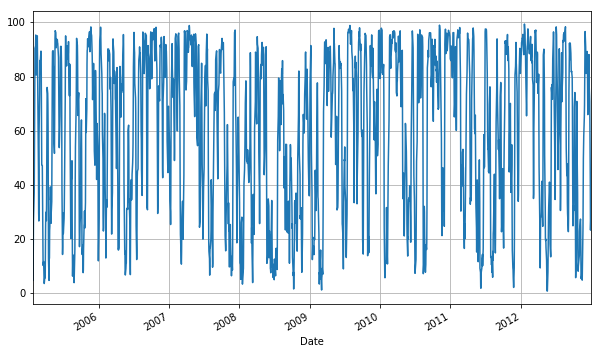

In [4]:
k.stochastic()

## End of the Month strategy
Among practitioners there is belief that stock prices increase during the last four days and the first three days of each month. Most researchers explain this effect by timing of monthly cash flows by pension funds and reinvested in the stock market. 

Employing this phenomena, we build following strategy: buy  every 28th day of each month and sell it on 3d day of the next month.
But after computing the returns of this strategy for our testing data(from '2013-01-01' to '2017-01-01') we have obtained negative returns

In [13]:
s=strategy("^GSPC",2013,1,1,2017,1,1)
s.end_month()

(-16.229980999999952, -0.72979383975949919)

## Results 
Now we compare all 4 strategies.

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web  
from strategy2 import strategy
s=strategy("^GSPC",2013,1,1,2017,1,1)

pnl1,sharpe1=s.ma(22,58)#calculation of pnl and sharpe ratio for MA
pnl2,sharpe2=s.filtering(0.01)
pnl3,sharpe3=s.stochastic()
pnl4,sharpe4=s.end_month()

df=pd.DataFrame({'Sharpe Ratio':[sharpe1,sharpe2,sharpe3,sharpe4],
                 'P&L':[pnl1,pnl2,pnl3,pnl4]},
                index=['MA crossover','Filtering strategy', 'Stochastic', 'End of the month'])#use Dataframe method in order to create the table 

print(df)
 


                           P&L  Sharpe Ratio
MA crossover        217.860349      4.979830
Filtering strategy  679.900632      3.787815
Stochastic          258.869386      3.338157
End of the month    -16.229981     -0.729794


With regards to the results, we conclude that risk taking investors would prefer Filtering Strategy, while risk-averse investors choose MA crossover strategy